/opt/anaconda3/envs/wfd/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


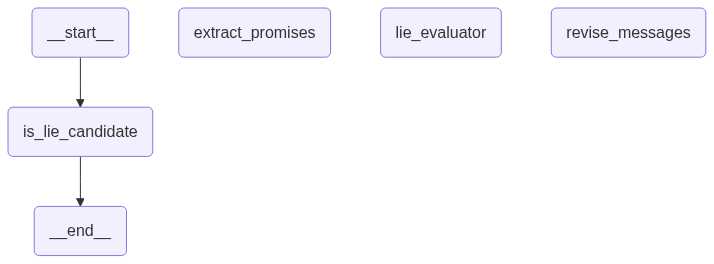

In [1]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict, Optional
from IPython.display import Image, display


# === Minimal state type ===
class MessageState(TypedDict):
    message: str
    is_lie_candidate: Optional[bool]
    promises: dict
    is_lie: Optional[bool]
    editing_context: Optional[str]


# === Dummy nodes ===
def is_lie_candidate(state: MessageState): return {"is_lie_candidate": True}
def extract_promises(state: MessageState): return {"promises": {"dummy": "value"}}
def lie_evaluator(state: MessageState): return {"is_lie": False, "editing_context": "revise this"}
def revise_messages(state: MessageState): return {"message": "revised message", "editing_context": None}

# === Router functions ===
def candidate_router(state: MessageState):
    return "extract_promises" if state["is_lie_candidate"] else END

def promise_router(state: MessageState):
    return "lie_evaluator" if state.get("promises") else END

def revision_router(state: MessageState):
    return "revise_messages" if state.get("editing_context") else END


# === Build the graph ===
graph = StateGraph(MessageState)
graph.add_node("is_lie_candidate", is_lie_candidate)
graph.add_node("extract_promises", extract_promises)
graph.add_node("lie_evaluator", lie_evaluator)
graph.add_node("revise_messages", revise_messages)

graph.add_edge(START, "is_lie_candidate")
graph.add_conditional_edges("is_lie_candidate", candidate_router)
graph.add_conditional_edges("extract_promises", promise_router)
graph.add_conditional_edges("lie_evaluator", revision_router)
graph.add_edge("revise_messages", "is_lie_candidate")
graph.add_edge("lie_evaluator", END)

# === Compile and visualize ===
runnable = graph.compile()
display(Image(runnable.get_graph().draw_mermaid_png()))